--------------------
#### Movie Sentiment Analysis 

- IMDB dataset
- data processing
- keras tokenizer
- RNN
- Evaluate
----------------------

#### dataset 

can be downloaded from this Kaggle link.https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

The file contains 50,000 records and two columns: review and sentiment. 

The review column contains text for the review and the sentiment column contains sentiment for the review. 

The sentiment column can have two values i.e. "positive" and "negative" which makes our problem a binary classification problem.

In [61]:
import pandas as pd
import numpy as np
from numpy import array
import re
import nltk

import matplotlib.pylab as plt

from keras.preprocessing.text import one_hot
#from keras.preprocessing.sequence import pad_sequences
from keras.utils import pad_sequences

from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense, BatchNormalization
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D

from keras.layers import Embedding
from keras.preprocessing.text import Tokenizer

from sklearn.model_selection import train_test_split

#### Importing and Analyzing the Dataset

In [62]:
location = r'D:\AI-DATASETS\02-MISC-large\keras\datasets\IMDB-cleaned-text.csv'

In [63]:
movie_reviews = pd.read_csv(location)

In [64]:
movie_reviews.isnull().values.any()

False

In [65]:
movie_reviews.shape

(50000, 6)

In [66]:
pd.set_option('max_colwidth', None)

sample rows a few times and note down data processing steps

In [67]:
movie_reviews.sample(3)

,Unnamed: 0,review,sentiment,contractions,ExpandedText,CleanedText
28436,28436,"After an initial release of 4 very good Eurotrash titles, REDEMPTION has managed to scrape the bottom of the barrel with THE BLOODSUCKER LEADS THE DANCE. I found NO Bloodsuckers anywhere in this movie.<br /><br />The story is simple. A mysterious count invites several actresses to his castle for a little vacation. After some sofcore sexual shenanigans the girls get decapitated one by one. Who is the killer? Who knows? There are more red herrings in this one than at the local fish market on Friday.<br /><br />The pace is excruciating. The story is silly and the skin scenes aren't all that terrific either.<br /><br />Give this one a miss.",negative,[],"After an initial release of 4 very good Eurotrash titles, REDEMPTION has managed to scrape the bottom of the barrel with THE BLOODSUCKER LEADS THE DANCE. I found NO Bloodsuckers anywhere in this movie.<br /><br />The story is simple. A mysterious count invites several actresses to his castle for a little vacation. After some sofcore sexual shenanigans the girls get decapitated one by one. Who is the killer? Who knows? There are more red herrings in this one than at the local fish market on Friday.<br /><br />The pace is excruciating. The story is silly and the skin scenes are not all that terrific either.<br /><br />Give this one a miss.",After an initial release of very good Eurotrash titles REDEMPTION has managed to scrape the bottom of the barrel with THE BLOODSUCKER LEADS THE DANCE found NO Bloodsuckers anywhere in this movie The story is simple mysterious count invites several actresses to his castle for little vacation After some sofcore sexual shenanigans the girls get decapitated one by one Who is the killer Who knows There are more red herrings in this one than at the local fish market on Friday The pace is excruciating The story is silly and the skin scenes are not all that terrific either Give this one miss
45059,45059,"This was a classic case of something that should never have been. Gloria was now a single mother, her husband had left her because she wouldn't live in some commune with him (he was mad that Reagan had been elected and wanted to turn his back on society). Right then and there I had problems with the series - come on, I say to myself, is this the same noble Michael Stivic that countered Archie Bunker's right winged philosophies? The series went on, but it just didn't have any pizazz. Whatever momentum Sally Struthers gained from All the Family was long gone. Maybe, if the series had been given another name and presented as being totally independent of All In The Family, it might have worked out. Ah well, that's show business.",negative,[],"This was a classic case of something that should never have been. Gloria was now a single mother, her husband had left her because she would not live in some commune with him (he was mad that Reagan had been elected and wanted to turn his back on society). Right then and there I had problems with the series - come on, I say to myself, is this the same noble Michael Stivic that countered Archie Bunker's right winged philosophies? The series went on, but it just did not have any pizazz. Whatever momentum Sally Struthers gained from All the Family was long gone. Maybe, if the series had been given another name and presented as being totally independent of All In The Family, it might have worked out. Ah well, that is show business.",This was classic case of something that should never have been Gloria was now single mother her husband had left her because she would not live in some commune with him he was mad that Reagan had been elected and wanted to turn his back on society Right then and there had problems with the series come on say to myself is this the same noble Michael Stivic that countered Archie Bunker right winged philosophies The series went on but it just did not have any pizazz Whatever momentum Sally Struthers gained from All the 

text contains punctuations, brackets, and a few HTML tags as well. 

We will preprocess this text distribution of positive and negative sentiments in our dataset.

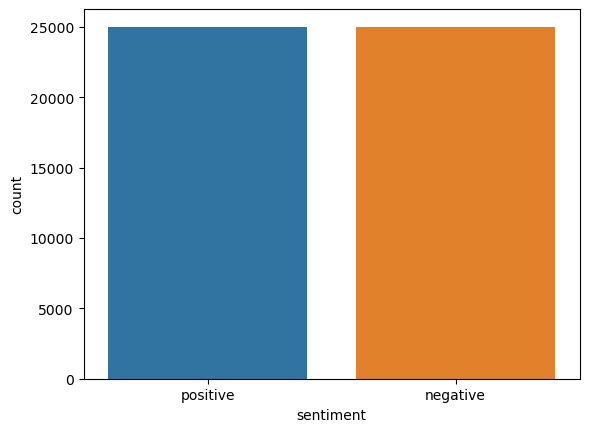

In [68]:
import seaborn as sns

sns.countplot(x='sentiment', data=movie_reviews);

From the output, it is clear that the dataset contains equal number of positive and negative reviews

Next, we need to convert our labels into digits. 

Since we only have two labels in the output i.e. "positive" and "negative".

We can simply convert them into integers by replacing "positive" with digit 1 and negative with digit 0

In [69]:
y = movie_reviews['sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

Finally, we need to divide our dataset into train and test sets. The train set will be used to train our deep learning models while the test set will be used to evaluate how well our model performs.

We can use train_test_split method from the sklearn.model.selection module

In [70]:
X = movie_reviews['CleanedText']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size   = 0.20, 
                                                    random_state= 42)

In [72]:
X_train.shape, X_test.shape

((40000,), (10000,))

#### Tokenize 
- using keras tokenizer

In the word-to-index dictionary, each word in the corpus is used as a key, while a corresponding unique index is used as the value for the key.

`num_words:`
- the maximum number of words to keep, based on word frequency. 
- Only the most common `num_words-1` words will be kept.

In [73]:
%%time
num_words = 15000

tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X_train)

Wall time: 8.35 s


In [74]:
print(tokenizer.document_count)

40000


In [75]:
for token, count in zip(list(tokenizer.word_counts.keys())[:15], list(tokenizer.word_counts.values())[:15]):
    print(token, ' : ', count)

that  :  115759
is  :  221840
what  :  26092
kept  :  1204
asking  :  375
myself  :  1848
during  :  3442
the  :  534563
many  :  10734
fights  :  435
screaming  :  403
matches  :  155
swearing  :  89
and  :  259130
general  :  1211


In [76]:
# print(tokenizer.word_docs,'\n')
# print(tokenizer.word_index,'\n')

Transforms each text in texts to a sequence of integers.

Only top `num_words-1` most frequent words will be taken into account.
Only words known by the tokenizer will be taken into account.

In [77]:
%%time
X_train = tokenizer.texts_to_sequences(X_train)
X_test  = tokenizer.texts_to_sequences(X_test)

Wall time: 8.17 s


In [78]:
print(X_train[:1])

[[9, 4, 44, 771, 2101, 513, 290, 1, 106, 1842, 1969, 4255, 6378, 2, 767, 4757, 9, 1, 219, 1, 6061, 82, 749, 53, 50, 18, 99, 3, 1, 24, 1948, 100, 31, 21, 32, 117, 1086, 9, 6, 4, 2301, 1149, 5, 437, 44, 529, 5, 88, 28, 20, 38, 877, 387, 14, 1, 152, 5, 2911, 23, 4292, 19, 2873, 9, 43, 77, 212, 73, 123, 7, 81, 3076, 188, 19, 225, 2, 1, 416, 193, 4860, 94, 10, 61, 24, 14, 14347, 76, 349, 290, 17, 16, 6, 193, 25, 293, 9, 12, 1, 1802, 9962, 114, 402, 2, 12, 1, 1634, 11113, 551, 65, 408, 364, 37, 10, 115, 44, 112, 352, 28, 11719, 33, 16, 42, 11, 88, 45, 6717, 14, 348, 12145, 1130, 60, 7, 1, 448, 208, 977, 5, 4099, 7, 171, 3, 32, 422, 667, 594, 9, 70, 52, 226, 109, 815, 33, 165, 27, 211, 9, 4, 1, 412, 351, 55, 3672, 266, 10111, 154, 1656, 182, 4, 1, 11503, 11308, 697, 1886, 1, 1162, 3, 2815, 11309, 3648, 1636, 2, 144, 94, 220, 3, 198, 311, 2, 94, 1036, 15, 87, 3, 130, 2767, 8586, 16, 68, 10, 9075, 97, 3, 1, 3949, 290, 8, 13, 960, 33, 1, 473, 2545, 234, 70, 78, 106, 106, 665, 9824, 58, 12617, 84

If you view the X_train variable in variable explorer, you will see that it contains 40,000 lists where each list contains integers. 

Each list actually corresponds to each sentence in the training set. 

You will also notice that the size of each list is different. This is because sentences have different lengths.

We set the maximum size of each list to 100. We can try a different size. 

The lists with size greater than 100 will be truncated to 100. For the lists that have length less than 100, we will add 0 at the end of the list until it reaches the max length. This process is called __padding__.

In [79]:
len(X_train[1])

266

In [80]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1
vocab_size

92462

**pad sequences**

- examples

In [81]:
sequence = [[1], [2, 3], [4, 5, 6]]
pad_sequences(sequence)

array([[0, 0, 1],
       [0, 2, 3],
       [4, 5, 6]])

In [82]:
pad_sequences(sequence, value=-1)

array([[-1, -1,  1],
       [-1,  2,  3],
       [ 4,  5,  6]])

In [83]:
pad_sequences(sequence, padding='post')

array([[1, 0, 0],
       [2, 3, 0],
       [4, 5, 6]])

In [84]:
pad_sequences(sequence, maxlen=20)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 5, 6]])

.. back to the code ...

**determine the length of documents**


In [85]:
number_tokens_in_docs = []

for i in range(len(X_train)):
    number_tokens_in_docs.append(len(X_train[i]))

In [86]:
pd.DataFrame(number_tokens_in_docs).describe()

,0
count,40000.000000
mean,214.590300
std,158.948742
min,6.000000
25%,118.000000
50%,161.000000
75%,260.000000
max,2185.000000


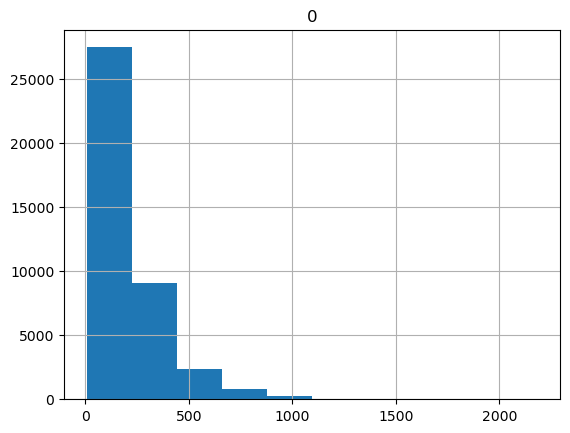

In [87]:
pd.DataFrame(number_tokens_in_docs).hist();

In [88]:
maxlen = 170

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test  = pad_sequences(X_test,  padding='post', maxlen=maxlen)

Now if we view the X_train or X_test, we will see that all the lists have same length i.e. 100. 

Also, the vocabulary_size variable now contains a value 92547 which means that our corpus has 92547 unique words.

In [89]:
def plot_history(history):

    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])

    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.grid()

#### SimpleRNN

In [55]:
from keras import Sequential
from keras.layers import Embedding, SimpleRNN, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2, l1

- return_sequences: Boolean. 
    - Whether to return the last output in the output sequence, or the full sequence. Default: False.
- return_state: Boolean. 
    - Whether to return the last state in addition to the output. Default: False.

In [96]:
model           = Sequential()
embedding_layer = Embedding(input_dim   = vocab_size, 
                            output_dim  = 32, 
                            #weights     =[embedding_matrix], 
                            input_length= maxlen,
                           )
model.add(embedding_layer)

model.add(SimpleRNN(16, 
                    input_shape        = (num_words, maxlen), 
                    return_sequences   = True, 
                    return_state       = False, 
                    activation         = "relu",
                    #kernel_regularizer = l1(0.001)
                   ))

#model.add(SimpleRNN(16,                                     return_sequences=True, return_state=False, activation="relu"))
model.add(SimpleRNN(16, 
                    return_sequences   = True, 
                    return_state       = False, 
                    activation         = "relu",
                    #kernel_regularizer = l1(0.001)
                   ))


#model.add(SimpleRNN(16,                                    return_sequences=True, return_state=False, activation="relu"))
model.add(SimpleRNN(16, 
                    return_sequences   = False, 
                    return_state       = False, 
                    activation         = "relu",
                    #kernel_regularizer = l1(0.001)
                   ))

model.add(Dense(2, activation='softmax'))
#model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(), metrics=['acc'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Define learning rate reduction
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.6, patience=2, min_lr=0.0001)

In [97]:
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 170, 32)           2958784   
                                                                 
 simple_rnn_16 (SimpleRNN)   (None, 170, 16)           784       
                                                                 
 simple_rnn_17 (SimpleRNN)   (None, 170, 16)           528       
                                                                 
 simple_rnn_18 (SimpleRNN)   (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
Total params: 2,960,658
Trainable params: 2,960,658
Non-trainable params: 0
_________________________________________________________________
None


In [98]:
%%time
history = model.fit(X_train, 
                    y_train, 
                    batch_size      = 128, 
                    epochs          = 3, 
                    verbose         = 1, 
                    validation_split= 0.2,
                    callbacks       = [early_stopping, reduce_lr])

Epoch 1/3
250/250 [==============================] - 38s 140ms/step - loss: 0.6008 - acc: 0.6465 - val_loss: 0.5365 - val_acc: 0.7945 - lr: 0.0010
Epoch 2/3
250/250 [==============================] - 39s 155ms/step - loss: 0.4175 - acc: 0.8119 - val_loss: 0.3580 - val_acc: 0.8559 - lr: 0.0010
Epoch 3/3
250/250 [==============================] - 36s 144ms/step - loss: 0.2801 - acc: 0.8931 - val_loss: 0.3542 - val_acc: 0.8506 - lr: 0.0010
Wall time: 1min 53s


313/313 [==============================] - 6s 19ms/step - loss: 0.3401 - acc: 0.8499
Test Score: 0.34008485078811646
Test Accuracy: 0.8499000072479248


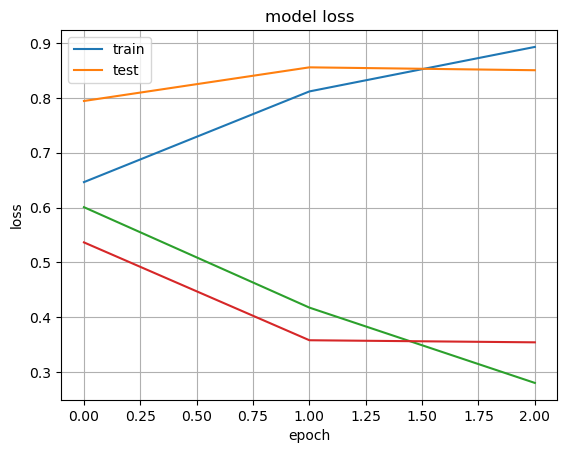

In [99]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

plot_history(history)

#### Making Predictions on Single Instance

In [89]:
np.set_printoptions(suppress=True, precision = 6)


In [100]:
index = np.random.randint(len(X))

test_review = X[index]
print(test_review)

If you really truly want to waste two hours of your life do the following Look through the TV listings Find the movie Men in White When Men in White comes on sit and watch And that is it After sitting through two hours of bad puns dreadful and not that funny movie references and experiencing something with possibly the lowest production values ever made in recent history you will have wasted two hours of your life and wonder exactly why Why did do this was stupid enough to think that this film might actually be some good It was not But on the other hand if you are old enough to remember Power Rangers you might spot some familiar faces during the film Presumably to save on production costs Saban who also make Power Rangers decided to liberally sprinkle old monster costumes from everyone is favourite tacky toy spawning franchise throughout the film spotted quite few old monsters from episodes saw from when was kid so guess it could at least be said it has some nostalgia value But if you 

In [101]:
movie_reviews.iloc[index]

Unnamed: 0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

You can clearly see that this is __negative__ review. 

To predict the sentiment of this review, we have to convert this review into numeric form. We can do so using the tokenizer that we created in word embedding section. The text_to_sequences method will convert the sentence into its numeric counter part.

Next, we need to pad our input sequence as we did for our corpus. 

Finally, we can use the predict method of our model and pass it our processed input sequence. 

In [102]:
instance = tokenizer.texts_to_sequences(test_review)

In [103]:
flat_list = []
for sublist in instance:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]
#flat_list

In [104]:
instance = pad_sequences(flat_list, padding='post', maxlen=maxlen)

model.predict(instance)

1/1 [==============================] - 1s 751ms/step


array([[0.62515914, 0.37484083]], dtype=float32)

In [ ]:
# Save the entire model to a file
model.save('rnn_SA_IMDB_model_simpleRNN.h5')

#### Usinf return_state=True

- we need to use functional api of tf/keras (not sequential)

In [106]:
from keras.layers import Input, Embedding, SimpleRNN, Dense, concatenate
from keras.models import Model
from keras.optimizers import RMSprop

In [107]:
# Define input layer
inputs = Input(shape=(maxlen,))

In [108]:
# Add an Embedding layer
embedding_layer = Embedding(input_dim=vocab_size, output_dim=64, input_length=maxlen)(inputs)


In [109]:
# First SimpleRNN layer
rnn1, state_h1 = SimpleRNN(8, 
                           return_sequences=True, 
                           return_state=True, 
                           activation="relu")(embedding_layer)


In [110]:
# Second SimpleRNN layer
rnn2, state_h2 = SimpleRNN(8, 
                           return_sequences=True, 
                           return_state=True, 
                           activation="relu")(rnn1)


In [111]:
# Third SimpleRNN layer
rnn3, state_h3 = SimpleRNN(8, 
                           return_sequences=False, 
                           return_state=True, 
                           activation="relu")(rnn2)


In [112]:
# Concatenate the hidden states
merged_state = concatenate([state_h1, state_h2, state_h3])

In [113]:
# Dense layer for classification
output = Dense(2, activation='softmax')(merged_state)

In [114]:
# Define the model
model = Model(inputs=inputs, outputs=output)

In [150]:
# Compile the model
model.compile(optimizer=RMSprop(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])


In [151]:
# Print the model summary
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 170)]                0         []                            
                                                                                                  
 embedding_33 (Embedding)    (None, 170, 64)              5923008   ['input_4[0][0]']             
                                                                                                  
 simple_rnn_89 (SimpleRNN)   [(None, 170, 8),             584       ['embedding_33[0][0]']        
                              (None, 8)]                                                          
                                                                                                  
 simple_rnn_90 (SimpleRNN)   [(None, 170, 8),             136       ['simple_rnn_89[0][0]'] 

In [152]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Define learning rate reduction
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

In [153]:
# Train the model with early stopping and learning rate reduction
history = model.fit(X_train, 
                    y_train, 
                    batch_size      = 128, 
                    epochs          = 100, 
                    verbose         = 1, 
                    validation_split= 0.2,
                    callbacks       = [early_stopping, reduce_lr])

Epoch 1/100
250/250 [==============================] - 66s 232ms/step - loss: 0.6198 - acc: 0.6412 - val_loss: 0.4371 - val_acc: 0.8152 - lr: 0.0010
Epoch 2/100
250/250 [==============================] - 56s 224ms/step - loss: 0.4189 - acc: 0.8232 - val_loss: 0.3693 - val_acc: 0.8519 - lr: 0.0010
Epoch 3/100
250/250 [==============================] - 58s 231ms/step - loss: 0.3447 - acc: 0.8642 - val_loss: 0.3459 - val_acc: 0.8621 - lr: 0.0010
Epoch 4/100
250/250 [==============================] - 56s 225ms/step - loss: 0.3000 - acc: 0.8846 - val_loss: 0.4626 - val_acc: 0.7920 - lr: 0.0010
Epoch 5/100
250/250 [==============================] - 56s 224ms/step - loss: 0.2697 - acc: 0.9013 - val_loss: 0.4114 - val_acc: 0.8451 - lr: 0.0010
Epoch 6/100
250/250 [==============================] - 42s 169ms/step - loss: 0.1840 - acc: 0.9367 - val_loss: 0.3725 - val_acc: 0.8597 - lr: 2.0000e-04


In [154]:
# Evaluate the model on the test set
accuracy = model.evaluate(X_test, y_test)[1]
print("Test Accuracy:", accuracy)


313/313 [==============================] - 5s 15ms/step - loss: 0.3501 - acc: 0.8594
Test Accuracy: 0.8593999743461609


In [ ]:
# Save the entire model to a file
model.save('rnn_SA_IMDB_model_functional.h5')

#### Use Bi directioanl RNN

In [69]:
from keras.layers import Bidirectional

In [76]:
model           = Sequential()
embedding_layer = Embedding(input_dim   = vocab_size, 
                            output_dim  = 64, 
                            #weights     =[embedding_matrix], 
                            input_length= maxlen,
                           )
model.add(embedding_layer)
model.add(Bidirectional(SimpleRNN(8, input_shape = (num_words, maxlen), return_sequences=True, return_state=False, activation="relu")))
model.add(Bidirectional(SimpleRNN(8,   return_sequences=True, return_state=False, activation="relu")))
model.add(Bidirectional(SimpleRNN(8,   return_sequences=True, return_state=False, activation="relu")))

model.add(GlobalMaxPooling1D())

model.add(Dropout(0.3))  # Add dropout with a rate of 0.2

model.add(Dense(2, activation='softmax'))
#model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(), metrics=['acc'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Define learning rate reduction
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

In [60]:
# es = EarlyStopping(monitor='val_loss', mode='min')
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
# es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=1)
# es = EarlyStopping(monitor='val_loss', mode='min', baseline=0.4)

In [77]:
%%time
history = model.fit(X_train, 
                    y_train, 
                    batch_size      = 128, 
                    epochs          = 100, 
                    verbose         = 1, 
                    validation_split= 0.2,
                    callbacks       = [early_stopping, reduce_lr])

Epoch 1/100
250/250 [==============================] - 130s 445ms/step - loss: 0.6106 - acc: 0.6691 - val_loss: 0.5152 - val_acc: 0.7679 - lr: 0.0010
Epoch 2/100
250/250 [==============================] - 108s 430ms/step - loss: 0.4462 - acc: 0.8045 - val_loss: 0.3701 - val_acc: 0.8440 - lr: 0.0010
Epoch 3/100
250/250 [==============================] - 106s 423ms/step - loss: 0.3016 - acc: 0.8813 - val_loss: 0.3365 - val_acc: 0.8553 - lr: 0.0010
Epoch 4/100
250/250 [==============================] - 108s 433ms/step - loss: 0.2083 - acc: 0.9232 - val_loss: 0.3866 - val_acc: 0.8662 - lr: 0.0010
Epoch 5/100
250/250 [==============================] - 107s 429ms/step - loss: 0.1536 - acc: 0.9443 - val_loss: 0.4261 - val_acc: 0.8604 - lr: 0.0010
Epoch 6/100
250/250 [==============================] - 108s 431ms/step - loss: 0.0838 - acc: 0.9727 - val_loss: 0.5823 - val_acc: 0.8579 - lr: 2.0000e-04
CPU times: total: 29min 34s
Wall time: 11min 6s


In [78]:
# Evaluate the model on the test set
accuracy = model.evaluate(X_test, y_test)[1]
print("Test Accuracy:", accuracy)

313/313 [==============================] - 23s 74ms/step - loss: 0.3241 - acc: 0.8576
Test Accuracy: 0.8575999736785889


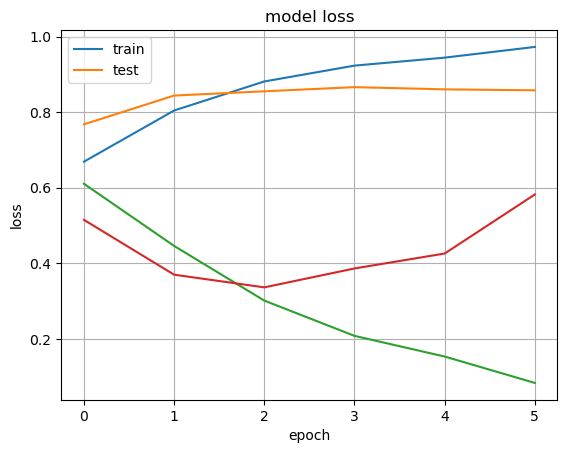

In [79]:
plot_history(history)